In [ ]:
!pip install graphviz

####@Imports

In [ ]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics


import graphviz
import pydot


####@Estabelecendo conexão com a Base de Dados

In [ ]:
dermatologyDb = pd.read_csv('dermatology.data');
#dermatologyDb

####**@Pré Processamento**

In [ ]:
#Informação do dataset
dermatologyDb.info()

In [ ]:
dermatologyDb

In [ ]:
#Removendo Idade fora do range e removendo strings da Idade.
dbAux = dermatologyDb[dermatologyDb["age"]!= "?"]
dbAux.fillna(method='bfill')
dermatologyDb.age.replace({"?":int(dbAux.age.median())},inplace = True)

In [ ]:
#Removendo Idade fora do range e removendo strings da Idade.


In [ ]:
#Verificação de Propriedades
dermatologyDb.describe()

In [ ]:
#Removendo todos nulos
dermatologyDb.dropna()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,target
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


####@Aplicação da Ávore de decisão

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (dermatologyDb.drop('family history', axis = 1), dermatologyDb['family history'], test_size  = 0.3)

In [ ]:
x_train.shape, x_test.shape

((256, 34), (110, 34))

In [ ]:
y_test.shape, y_test.shape

((110,), (110,))

In [ ]:
modeloClassificador = DecisionTreeClassifier(max_depth = None,
                                  max_features = None,
                                  criterion = 'entropy',
                                  min_samples_leaf = 1,
                                  min_samples_split = 2 
                                  )

In [ ]:
modeloClassificador_2 = DecisionTreeClassifier(max_depth = None,
                                  max_features = None,
                                  criterion = 'gini',
                                  min_samples_leaf = 1,
                                  min_samples_split = 2 
                                  )

--Treinando o modelo

In [ ]:
test_model_1 = modeloClassificador.fit(x_train, y_train)

In [ ]:
test_model_2 = modeloClassificador_2.fit(x_train, y_train)

--Resultado do teinamento

In [ ]:
resultado = test_model_1.predict(x_test)

resultado

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
resultado_2 = test_model_2.predict(x_test)

resultado_2

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print (metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        96
           1       0.25      0.21      0.23        14

    accuracy                           0.82       110
   macro avg       0.57      0.56      0.56       110
weighted avg       0.81      0.82      0.81       110



In [ ]:
print (metrics.classification_report(y_test, resultado_2))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        96
           1       0.31      0.36      0.33        14

    accuracy                           0.82       110
   macro avg       0.61      0.62      0.61       110
weighted avg       0.83      0.82      0.82       110



--Exibindo árvore

In [ ]:
dot_data = export_graphviz(
    test_model_1,
    out_file = None,
    feature_names = dermatologyDb.drop('family history', axis = 1).columns,
    class_names = ['0', '1'],
    filled = True, 
    rounded = True,
    proportion = True,
    node_ids = True,
    rotate = True,
    label = 'all',
    special_characters = True)

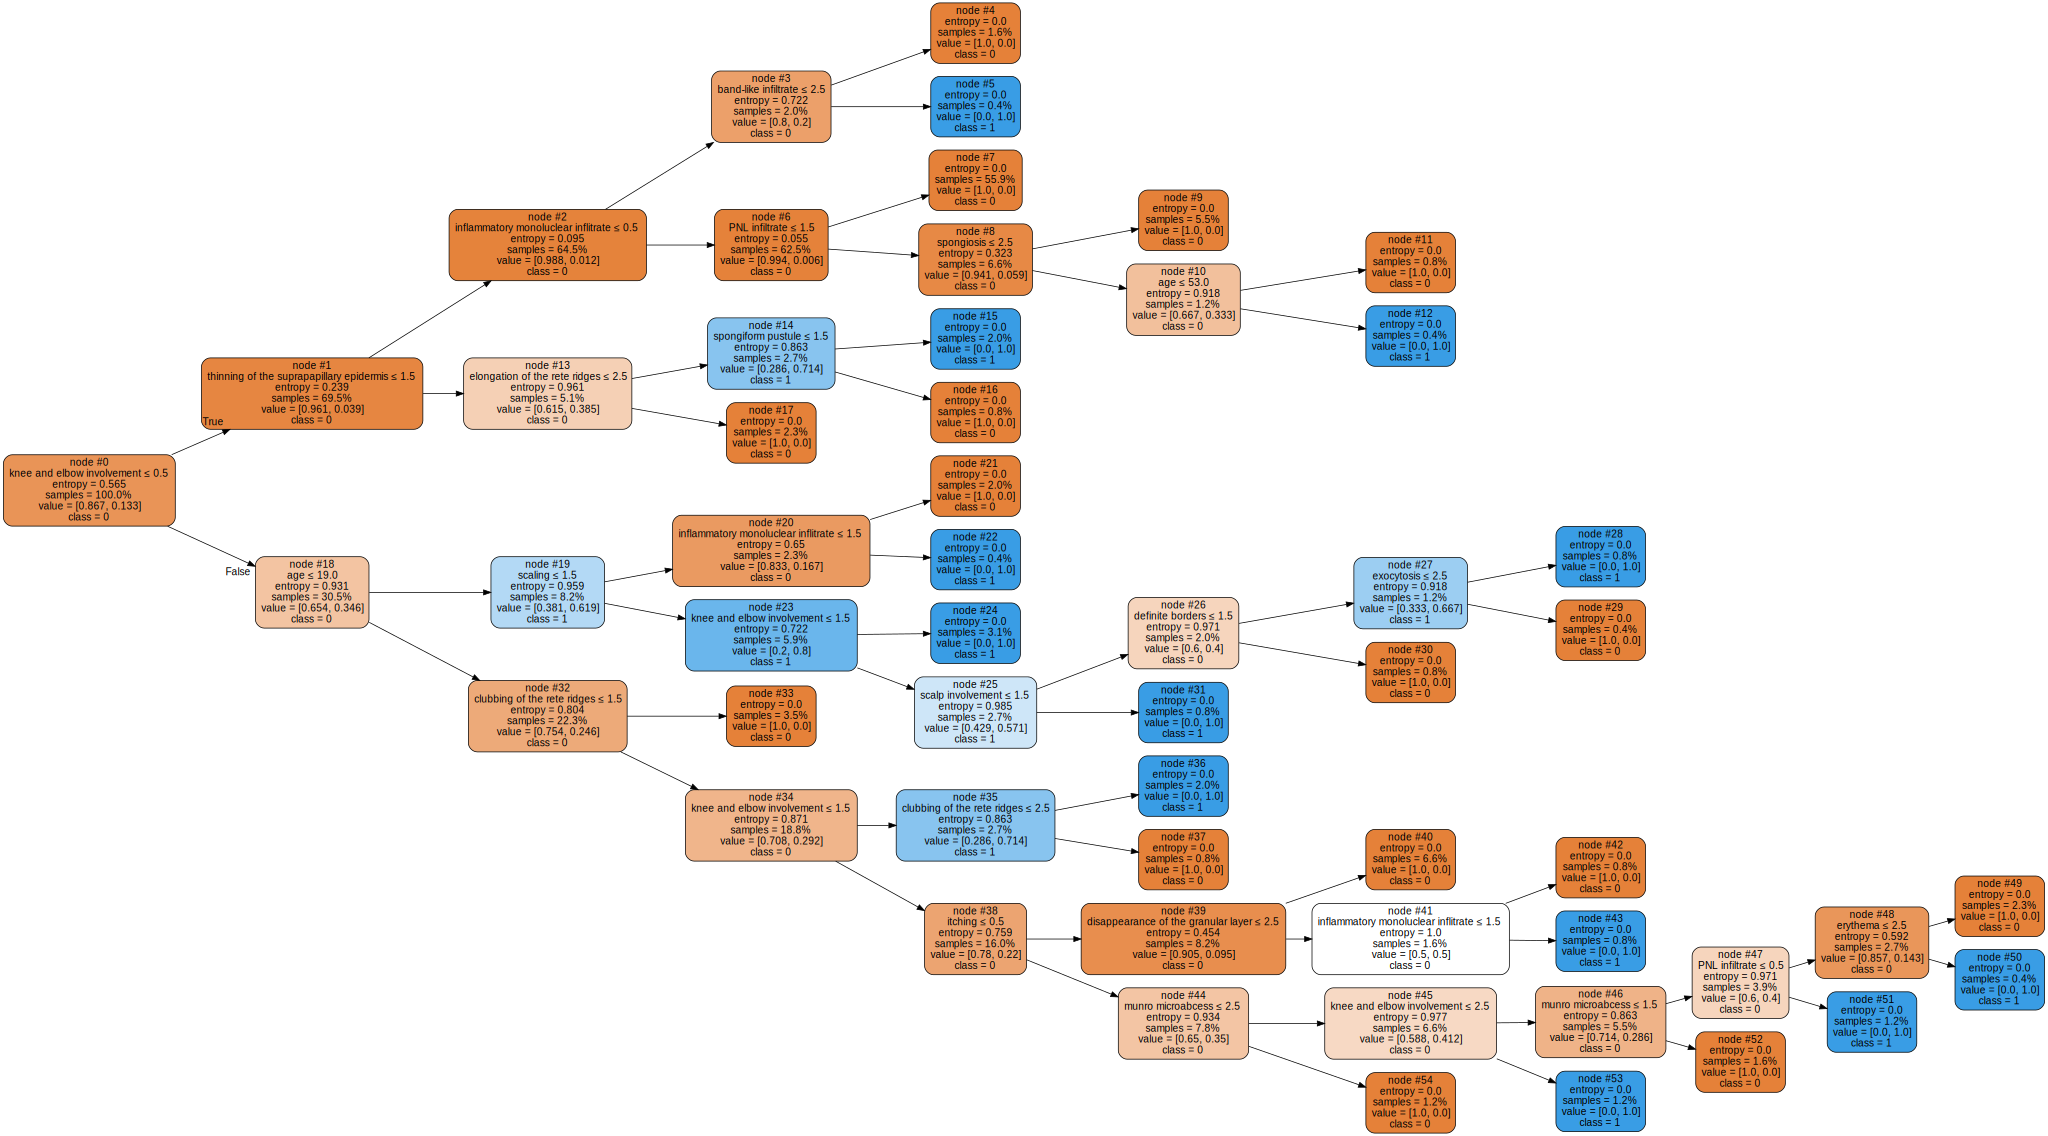

In [ ]:
graph = graphviz.Source(dot_data)

graph